# Assemble Boston dataframe

In [2]:
import pandas as pd
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read in the data
datafiles = glob.glob('../Data/Boston/hubway_trips.csv')
datafiles

['../Data/Boston/hubway_trips.csv']

In [48]:
df = pd.read_csv('../Data/Boston/hubway_trips_datetime.csv')

In [5]:
df.columns

Index([u'Unnamed: 0', u'seq_id', u'hubway_id', u'status', u'duration',
       u'start_date', u'stationid', u'end_date', u'end_statn', u'bike_nr',
       u'subsc_type', u'zip_code', u'birth_date', u'gender', u'start_day',
       u'nrides'],
      dtype='object')

###### Add features for number of rides per station.  Appoximate number of stations as number of unique start stations.

In [51]:
databydaygroup = df.groupby(["stationid", "start_day"], as_index=False)

In [52]:
databyday = databydaygroup.agg({"nrides": lambda x: x.sum(), "duration": lambda x: np.median(x)})

In [56]:
temp = databyday['start_day']

In [58]:
t1 = pd.DatetimeIndex(temp)

In [62]:
databyday['dayofweek'] = t1.dayofweek

In [68]:
databyday = databyday[databyday['dayofweek'] < 5]

In [69]:
databyday['ndays'] = np.ones(len(databyday))

In [70]:
databystation = databyday.groupby('stationid', as_index=False).agg({'nrides': lambda x: x.sum(), 'ndays': lambda x: x.sum(), 'duration': lambda x: np.median(x)})

In [71]:
databystation

,stationid,duration,nrides,ndays
0,3,660.00,7653,442
1,4,538.00,12573,419
2,5,541.00,7718,419
3,6,600.00,17133,435
4,7,600.00,7028,403
5,8,912.00,5274,439
6,9,720.00,12393,422
7,10,600.50,12190,420
8,11,675.00,10544,444
9,12,559.00,8300,445


###### Add feature for origin and destination density

In [72]:
station = pd.read_csv('../Data/Boston/stationdensity.csv')

In [73]:
databystation = databystation.merge(station, on='stationid')
databystation = databystation.drop(['terminal', 'station', 'status', 'municipal'], axis=1)

In [74]:
databystation = databystation.drop('Unnamed: 0', axis=1)

In [75]:
databystation = databystation.rename(columns={'empdensity': 'workdensity'})

###### Save final dataframe

In [76]:
popd = databystation['popdensity'].values
workd = databystation['workdensity'].values

In [77]:
huh = workd == '--'

In [78]:
workd[huh] = 10000.

In [79]:
workd = workd.astype('float')

In [80]:
databystation['workdensity'] = workd

In [81]:
databystation['ridesperday'] = databystation['nrides'] / databystation['ndays']

In [82]:
databystation.to_csv('../Data/Boston/BostonFeaturesByStation_weekday.csv')

In [86]:
databystation_allweek = pd.read_csv('../Data/Boston/BostonFeaturesByStation.csv')
popd_allweek = databystation_allweek['popdensity'].values
workd_allweek = databystation_allweek['workdensity'].values
totald_allweek = popd_allweek + workd_allweek
nrides_allweek = databystation_allweek['nrides'].values
ndays_allweek = databystation_allweek['ndays'].values

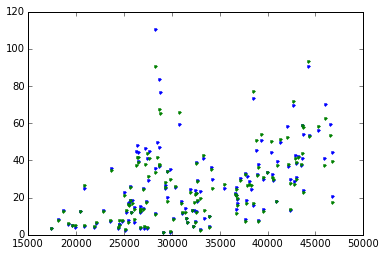

In [87]:
totald = popd + workd
nrides = databystation['nrides'].values
ndays = databystation['ndays'].values
#plt.plot(popd, nrides/ndays, '.')
#plt.plot(workd, nrides/ndays, '.')
plt.plot(totald, nrides/ndays, '.')
plt.plot(totald_allweek, nrides_allweek/ndays_allweek, '.')

In [41]:
databystation

,stationid,duration,nrides,ndays,lat,lng,popdensity,workdensity
0,3,713.75,9734,616,42.340021,-71.100812,20099.358399,16692.753934
1,4,540.00,18058,584,42.345392,-71.069616,18086.238605,21454.659663
2,5,570.00,10630,587,42.341814,-71.090179,19797.945738,21044.219878
3,6,630.00,23322,608,42.361285,-71.065140,18666.673244,13881.169878
4,7,705.00,9163,564,42.353412,-71.044624,16503.835555,9005.825005
5,8,960.00,7570,617,42.353334,-71.137313,16280.786425,9477.040112
6,9,720.00,17180,591,42.351313,-71.116174,20584.230737,12054.449577
7,10,660.00,16159,589,42.350075,-71.105884,21684.013392,16397.786389
8,11,674.50,12393,619,42.338629,-71.106500,19313.555852,13586.902291
9,12,589.75,10456,620,42.335911,-71.088496,17855.964344,19837.757630


In [ ]:
mbtaloc = '../Data/Boston/mbta.yaml'
mbtafile = open(mbtaloc, 'r')
mbta = yaml.load(configfile)
